In [4]:
import utils.notebooks as nb
from utils.loader import DicomDataset3D
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
from models.WNet2 import WNet
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

BATCH_SIZE = 1
EPOCHS = 14
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = WNet(1, num_levels=3).to(device)

train_dataloader = DataLoader(DicomDataset3D("data/train.csv"), batch_size=BATCH_SIZE)
test_dataloader = DataLoader(DicomDataset3D("data/test.csv"), batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [5]:
# def calc_pos_weight() -> float:
#     pos_weight_list = []
#     for data in iter(train_dataloader):
#         _, labels = data
#         pos_count = torch.sum(labels)
#         neg_count = labels.nelement() - torch.sum(labels)
#         pos_weight_list.append(neg_count/pos_count)
#     return sum(pos_weight_list)
# 
# print(calc_pos_weight())
pos_weight = torch.tensor([70]).to(device)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight).to(device)

In [6]:
for epoch in range(EPOCHS):
    for data in iter(train_dataloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # print(f'max label: {torch.max(labels)}')
        optimizer.zero_grad()

        output = model(inputs)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()
    writer.add_scalar("Loss/train", loss, epoch)
    print(loss)

tensor(0.9462, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.9150, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.8545, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.9743, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.9883, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.9988, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(1.0037, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.9930, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.9820, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.9730, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.9650, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.9581, device='cuda:0',


In [7]:
torch.save(model.state_dict(), './state_dicts/easy_wnet.pk')
# model.load_state_dict(torch.load('MODEL.pk'))

torch.Size([1, 1, 88, 256, 256])
torch.Size([1, 1, 88, 256, 256])


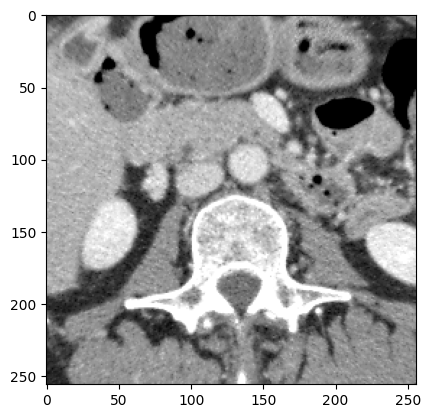

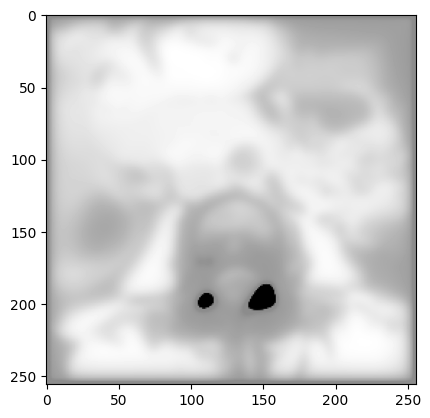

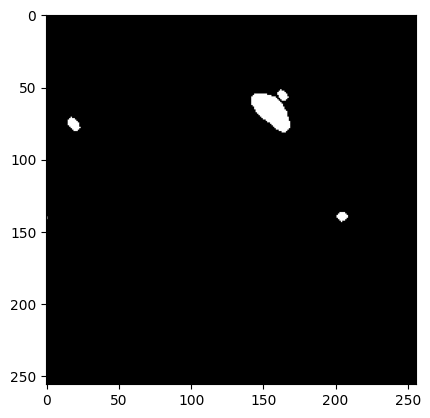

tensor(0., device='cuda:0', dtype=torch.float16)
tensor(0.6265, device='cuda:0', dtype=torch.float16)


In [8]:
with torch.no_grad():
    x, y = next(iter(train_dataloader))
    print(x.shape)
    if torch.cuda.is_available():
        x, y = x.cuda(), y.cuda()
    pred = model(x)
    pred = torch.nn.Sigmoid()(pred)
    print(pred.shape)
    nb.show(x[0], 45)
    nb.show(pred[0], 45)
    nb.show(y[0], 45)
    print(torch.min(pred))
    print(torch.max(pred))

In [9]:

writer.add_graph(model, next(iter(train_dataloader))[0].to(device))
writer.flush()

2023-04-21 10:30:17.637596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 10:30:18.317600: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-21 10:30:18.317663: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-21 10:30:18.317669: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv